In [154]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import numpy as np
import torch
import matplotlib.pyplot as plt
from vizer.draw import draw_boxes
from tops.config import instantiate, LazyConfig
from ssd import utils
np.random.seed(0)


In [155]:
config_path = "configs/tdt4265_fpn.py"
# cfg = LazyConfig.load(config_path)

# Get your input
img = read_image("data/tdt4265_2022/images/train/trip007_glos_Video00000_3.png")
# plt.imshow(to_pil_image(img))


In [156]:
from performance_assessment.save_comparison_images import get_config, get_trained_model, get_dataloader

cfg = get_config(config_path)
model = get_trained_model(cfg)

Saving SSD outputs to: outputs/
Model used: resnet34


Using cache found in C:\Users\sebsk/.cache\torch\hub\pytorch_vision_v0.11.2


--------------------------------------- [64, 128, 256, 512, 1024, 1024] ---------------------------------------
############################################################


INFO:root:Loaded checkpoint from outputs\tdt4265_fpn\checkpoints\51.ckpt
2022-05-05 13:42:29,409 [INFO ] Loaded checkpoint from outputs\tdt4265_fpn\checkpoints\51.ckpt


In [158]:
# x = normalize(img, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
x = torch.randn(1, 3, 128, 1024).to("cuda")

model(x)

fpn output:  torch.Size([1, 256, 32, 256])
fpn output:  torch.Size([1, 256, 16, 128])
fpn output:  torch.Size([1, 256, 8, 64])
fpn output:  torch.Size([1, 256, 4, 32])
fpn output:  torch.Size([1, 256, 2, 16])
fpn output:  torch.Size([1, 256, 1, 8])


[(tensor([], device='cuda:0', size=(0, 4), grad_fn=<IndexBackward0>),
  tensor([], device='cuda:0', dtype=torch.int64),
  tensor([], device='cuda:0', grad_fn=<IndexBackward0>))]

# pytorch-grad-cam


In [163]:
from ssd.modeling.retinanetOutputWrapper import RetinaNetOutputWrapper

RetinaNetOutputWrapper(model)




SSD300(
  (feature_extractor): ResnetWithFPN(
    (body): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Module(
        (0): Module(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): Module(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm

RetinaNetOutputWrapper(
  (model): SSD300(
    (feature_extractor): ResnetWithFPN(
      (body): ResNet(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Module(
          (0): Module(
            (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu): ReLU(inplace=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (1): Module(
            (conv1): Conv2d(64, 64, kernel_size=(3, 3), st

In [ ]:
target_layer = [model.feature_extractor.fpn._modules]
# print(target_layer)
print(target_layer[0])

# torchcam


In [ ]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet34
from torchcam.methods import SmoothGradCAMpp



model_resnet = resnet34(pretrained=True).eval()
print(model_resnet)
# model = cfg.model
# cam_extractor = SmoothGradCAMpp(model, target_layer=target_layer)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:


# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Preprocess your data and feed it to the model
out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

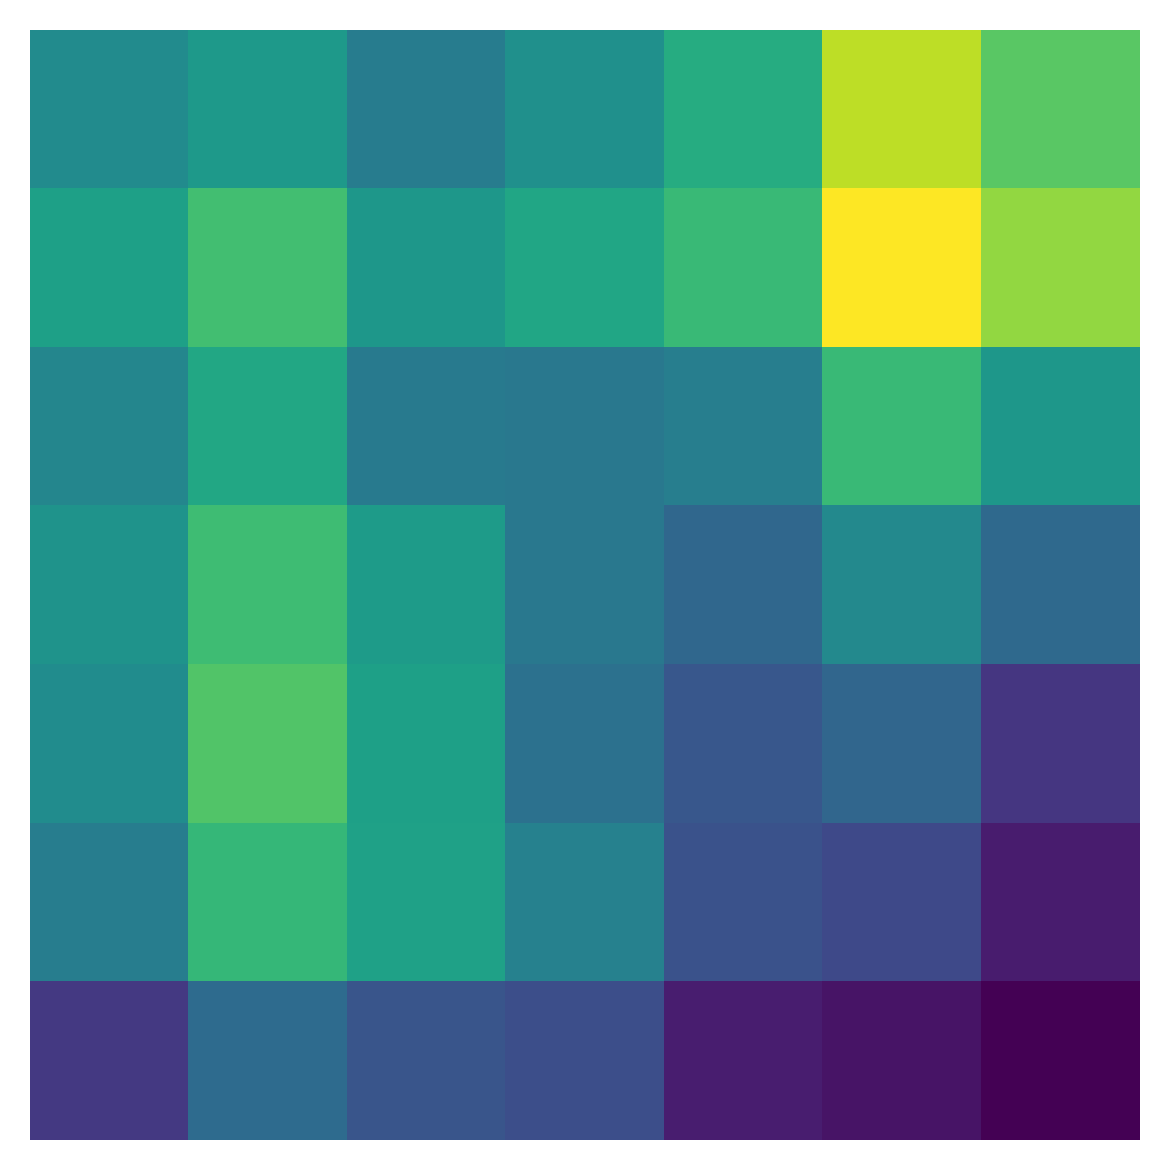

In [ ]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

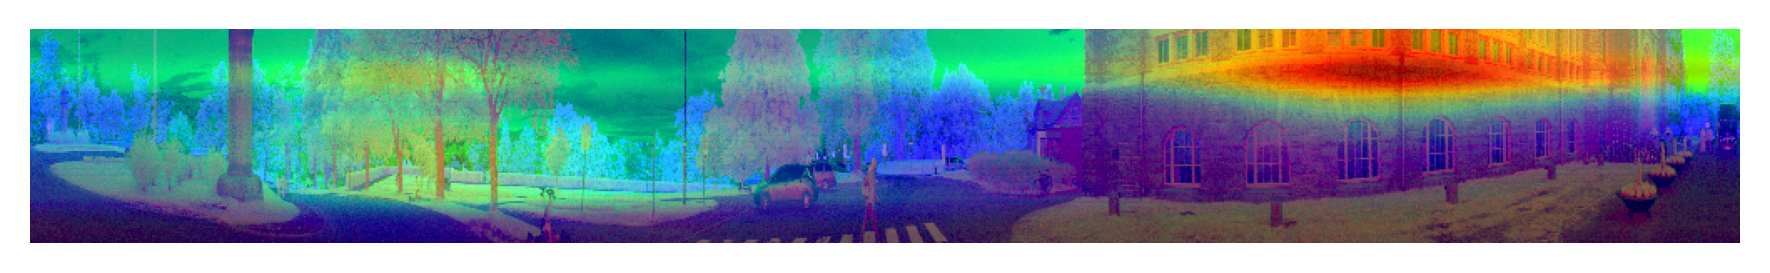

In [ ]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)

plt.rc('figure', dpi=300)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()